In [23]:
import numpy as np
from scipy.optimize import minimize
from numpy.linalg import norm
import matplotlib.pyplot as plt
from math import prod

#Initilize dummy data

#classify the labels to (1,-1)

b = 0

#Objective function
def objective(x):
    #[T, FBU, F1, F2, R]
    return x[0]


#constraint: for all point in the dataset, the prediciton using the current weight must be true:
#must come up with a way to form the constraints through loop ( check appendix )

# def constraint1(FBU, F2): return FBU - F2 - 20
# def constraint2(F1,F2): return F1 + F2 - 16
# def constraint3(F1): return 6 - F1 
# def constraint4(F1): return F1 - 4 
# def constraint5(F2): return 12 - F2
# def constraint6(F2): return F2 - 10
# def constraint7(R): return R
# def constraint8(R): return 24 - R
# def constraint9(T, F1, R): return T - F1 + R - 9999
# def constraint10(T): return T - 1145
# def constraint11(T): return 10305 - T

def constraint1(x): return x[1] - x[3] - 20
def constraint2(x): return x[2] + x[3] - 16
def constraint3(x): return 6 - x[2] 
def constraint4(x): return x[2] - 4 
def constraint5(x): return 12 - x[3]
def constraint6(x): return x[3] - 10
def constraint7(x): return x[4]
def constraint8(x): return 24 - x[4]
def constraint9(x): return x[0] - x[2] + x[4] - 9999
def constraint10(x): return x[0] - 1145
def constraint11(x): return 10305 - x[0]


cons = [{'type': 'eq', 'fun': constraint1},
        {'type': 'eq', 'fun': constraint2},
        {'type': 'ineq', 'fun': constraint3},
        {'type': 'ineq', 'fun': constraint4},
        {'type': 'ineq', 'fun': constraint5},
        {'type': 'ineq', 'fun': constraint6},
        {'type': 'ineq', 'fun': constraint7},
        {'type': 'ineq', 'fun': constraint8},
        {'type': 'eq', 'fun': constraint9},
        {'type': 'eq', 'fun': constraint10},
        {'type': 'ineq', 'fun': constraint11},
        ]




solution = minimize(objective, np.array([0,0,0,0,0]), constraints=cons)
a = ['T', 'FBU', 'F1', 'F2', 'R']
print({ j : '%.2f' % elem for j, elem in zip(a, solution.x) })
#----------- Appendix 

# for some reason it shows an incorrect result when formulated this way.. (Not sure, but the reason might be that the loop inserts the value it self and not the equation)

# constraints = []
# for i in range(len(X)):
#     constraints.append(
#         {'type': 'ineq', 'fun': lambda x: y[i] * (x.T @ X[i] - b) - 1}
#     )
#####
# cons2 = [{'type': 'ineq', 'fun': lambda x: y[0] * (x.T @ X[0] - b) - 1},
#          {'type': 'ineq', 'fun': lambda x: y[1] * (x.T @ X[1] - b) - 1},
#          {'type': 'ineq', 'fun': lambda x: y[2] * (x.T @ X[2] - b) - 1}]


{'T': '1143.31', 'FBU': '-259583.53', 'F1': '259619.47', 'F2': '-259603.50', 'R': '268460.39'}


In [92]:
import numpy as np
from scipy.optimize import minimize
from numpy.linalg import norm
import matplotlib.pyplot as plt
from math import prod
from sklearn import datasets


#Initilize dummy data

#classify the labels to (1,-1)

b = 0
#Initilize dummy data
X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
x = np.array([0.58977016,0.17946483])
#classify the labels to (1,-1)
y = np.where(y == 0, -1, 1)

# np.sign(y* (x @ X.T).T) - np.ones((np.sign(y* (x @ X.T).T)).shape)
X[0] @ x

3.406752938796356

[ 0.08456087 -0.16477837] -0.06600000000000004


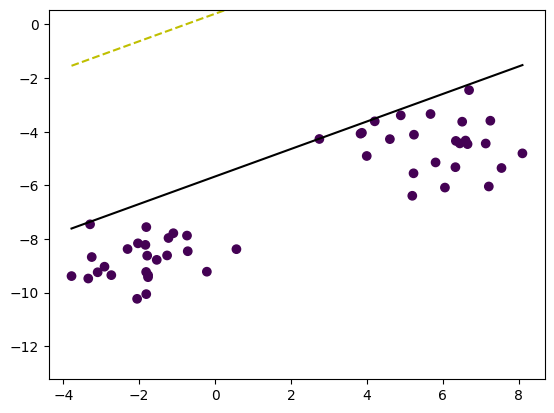

In [93]:
import numpy as np
from scipy.optimize import minimize
from numpy.linalg import norm
from math import sqrt


class SVM:
    def __init__(self, alpha=0.001, lambda_param=0.01, iterations=1000):
        self.alpha = alpha
        self.lambda_param = lambda_param
        self.iterations = iterations

        #wWights and bias
        self.w = None  # Should I initialize it to something else ?
        self.b = None

    # Gradient descent fit
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Adjust the labels to have distinct classes (1,-1)
        y_modified = [-1 if i < 0 else 1 for i in y]

        # Add the bias term to our weights
        self.w = np.zeros(n_features)
        self.b = 0

        # Graident descent here:
        for _ in range(self.iterations):
            for x_i, y_i in zip(X, y_modified):
                # if the prediciton is correct ( have the same sign )
                if y_i * (np.dot(x_i, self.w) - self.b) >= 1:
                    self.w -= self.alpha * (2 * self.w * self.lambda_param)
                    # Gradient with respect to the bias is 0 so no need to update
                else:
                    self.w -= self.alpha * \
                        (2 * self.w * self.lambda_param - np.dot(x_i, y_i))
                    self.b -= self.alpha * y_i

    def predict(self, x_new):
        # We simply subtitue our x_new in our linear forumla
        prediciton = np.dot(self.w, x_new) - self.b
        return np.sign(prediciton)

from sklearn import datasets
import numpy as np
from numpy.linalg import norm

if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt

    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)
    # predictions = clf.predict(X)

    print(clf.w, clf.b)
    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()

[0.88650136 0.30091918] -0.2830000000000002


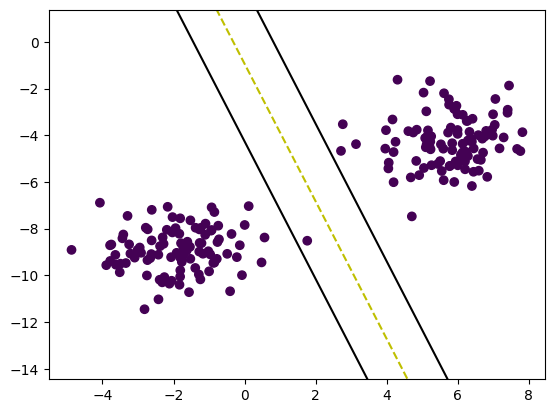

In [88]:

#Objective function
def objective(x):
    #[T, FBU, F1, F2, R]
    return 0.5 * x.T @ x


#constraint: for all point in the dataset, the prediciton using the current weight must be true:
#must come up with a way to form the constraints through loop ( check appendix )

# def constraint1(x): return np.sign(y* (x @ X.T).T) - np.ones((np.sign(y* (x @ X.T).T)).shape)
_tmp = []
for i in range(200):
    con = {'type': 'ineq', 'fun': lambda x, i=i:  y[i] * (x @ X[i] - b) -1 }
    _tmp.append(con)
cons = tuple(_tmp)
# cons = [{'type': 'ineq', 'fun': constraint1}]


solution = minimize(objective, np.array([100,100]), constraints=cons)
solution.x

from sklearn import datasets
import numpy as np
from numpy.linalg import norm

if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)
    clf.w = solution.x
    # predictions = clf.predict(X)

    print(clf.w, clf.b)
    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()